In [81]:
# Pandas is the main library used for exploratory data analysis
# Pandas is built on top of numpy 
# Numpy allows fast advanced mathematical operations on large amount of data
import numpy as np
import pandas as pd

# Library to assign missing values - not used here, better do it in EDA
from sklearn.impute import SimpleImputer

# Matplotlib is the main plotting library for python
# Seaborn is built on top of matplotlib and it's easier to use
# pandas also have same basic plotting capabilities which are again built on top of matplotlib
import matplotlib.pyplot as plt
# The next statement instructs matplotlib to plot the graphs inside the notebook
%matplotlib inline 
import seaborn as sns

# Another useful plotting library is plotly - it is used for interactive plots
# Library for pickling
import joblib

# Library needed for counting categorical values
import collections

# Library for splitting the data into train and test sets
from sklearn.model_selection import train_test_split 

# Model library
from sklearn.linear_model import LogisticRegression

# Scaling
from sklearn.preprocessing import StandardScaler

# label encoder
from sklearn.preprocessing import LabelEncoder

# Onehot encoding
from sklearn.preprocessing import LabelBinarizer
import pandas as pd
import numpy as np

# Metrics library
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

# Libary needed for resampling data
from sklearn.utils import resample


In [82]:
# Load the data - assuming its stored on your computer
personalLoan_df = pd.read_csv("personalLoan-cleaned.csv") 
# Check
personalLoan_df.head(10)

,customer_id,age,yrs_experience,family_size,education_level,income,mortgage_amt,credit_card_acct,credit_card_spend,share_trading_acct,fixed_deposit_acct,online_acct,personal_loan
0,3,43.0,33.0,1.0,0,54.0,0.0,0,0.0,0,0,1,0
1,8,60.0,12.0,3.0,1,121.0,125.0,1,2.1,1,0,1,1
2,10,63.0,13.0,4.0,1,30.0,98.0,0,0.0,0,1,1,0
3,11,35.0,12.0,1.0,0,121.0,0.0,0,0.0,0,0,0,0
4,12,37.0,29.0,3.0,1,47.0,0.0,1,0.9,1,0,1,0
5,13,66.0,28.0,4.0,0,88.0,249.0,1,0.7,0,0,1,0
6,16,26.0,9.0,3.0,1,103.0,0.0,0,0.0,0,0,1,1
7,17,51.0,14.0,1.0,1,98.0,0.0,1,1.3,0,0,0,0
8,18,27.0,39.0,1.0,1,70.0,0.0,0,0.0,0,0,1,0
9,19,45.0,31.0,2.0,0,179.0,255.0,0,0.0,0,1,0,1


In [83]:
# Store the features in variable X (uppercase as there are multiple features)

# Features are variables that affect the target/label
# So, it's all the columns excluding the target column
# However, you may also use a subset of features previously identified as best features
# You might want to experiment with both the full set and the best features
feature_cols = [
    'yrs_experience', 
    "age"
    'family_size', 
    'income',  
    'credit_card_spend',
]

X = personalLoan_df[feature_cols]
#print('X:\n', X)

# Store the labels/target in variable y (lower case as its a single value)
y = personalLoan_df['personal_loan']
#print('y:\n', y)

# Split into train/test set
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, # keep 20% for testing
                                                    random_state=2 # pass an int for reproducible rtesult
                                                    )

In [84]:
# Check
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2735, 4) (2735,)
(684, 4) (684,)


In [85]:
# Import the model library
from sklearn.linear_model import LogisticRegression

# Instantiate model and fit on training data
#lr_model = LogisticRegression(solver='lbfgs')
#lr_model.fit(X_train, y_train)
# Note the above 2 steps can be combined into a single step
# Warning: TOTAL NO. of ITERATIONS REACHED LIMIT, Increase the number of iterations (max_iter)
#lr_model = LogisticRegression(solver='lbfgs').fit(X_train, y_train)
lr_model = LogisticRegression(solver='lbfgs', max_iter=100).fit(X_train, y_train) # default max_iter is 100

# Predict using test data
y_pred = lr_model.predict(X_test)

# Quick check
# Print a few elements from the vector
# Slice the elements of the array from the beginning to index 5 (not included)
print(y_pred[:5]) # [:5] print first 5 elements
# Examples: https://www.w3schools.com/python/numpy_array_slicing.asp

[0. 0. 0. 0. 0.]


/Users/sohilpachbhaiya/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [86]:
# Import the model library
from sklearn.neighbors import KNeighborsClassifier

# Instantiate model and fit on training data
knn_model = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)

# Predict using test data
y_pred = knn_model.predict(X_test)

# Quick check
print(y_pred[:5])

[0. 0. 0. 0. 0.]


In [87]:
# Import the model library
from sklearn.svm import SVC

# Instantiate model and fit on training data
svm_model = SVC(kernel='linear', 
            class_weight='balanced', # penalize
            probability=True).fit(X_train, y_train)

# Predict using test data
y_pred = svm_model.predict(X_test)

# Quick check
print(y_pred[:5])

[195.  93.  81.  93. 189.]


In [88]:
# Import the model library
from sklearn.ensemble import RandomForestClassifier

# Instantiate model and fit on training data
rf_model = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)

# Predict using test data
y_pred = rf_model.predict(X_test)

# Quick check
print(y_pred[:5])

[0. 0. 0. 0. 0.]


In [89]:
# Import the model library
from sklearn.naive_bayes import GaussianNB

# Instantiate model and fit on training data
nb_model = GaussianNB().fit(X_train, y_train)

# Predict using test data
y_pred = rf_model.predict(X_test)

# Quick check
print(y_pred[:5])

[0. 0. 0. 0. 0.]


In [90]:
# Build the LR model
#lr_model = LogisticRegression(solver='lbfgs') # getting a warning with default max_iter of 100
#lr_model = LogisticRegression(solver='lbfgs', max_iter=200)
lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train, y_train)

/Users/sohilpachbhaiya/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

In [91]:
# Use the testing set (i.e. X-test)  to make predictions
y_pred = lr_model.predict(X_test)

# Compare the actual (true) labels or categories with the predited ones
print('True:', y_test.values[0:25])
print('Pred:', y_pred[0:25])

True: [  0. 135.   0. 126.   0.   0. 299. 225.   0.   0. 287.  90. 270. 164.
   0.   0.   0. 196. 203.   0. 117.   0.   0. 206.   0.]
Pred: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [92]:
classification_accuracy = accuracy_score(y_test, y_pred)
print(f"classification_accuracy: {classification_accuracy}")
print(f"Is this a good classifier?")

classification_accuracy: 0.564327485380117
Is this a good classifier?


In [93]:
# y_test = list of labels in the testing set
# y_pred = extracted from the model

# This formula will only work for binary classification problems
null_accuracy = max(y_test.mean(), 1 - y_test.mean())
print(f"null accuracy: {null_accuracy}")
print(f"No machine learning was used to build this classifer!")

null accuracy: 64.31286549707602
No machine learning was used to build this classifer!


In [94]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(f"confusion matrix:\n {cf_matrix}") #\n means new line i.e. next line
print(f"There are a lot of cases that are mis-classified")
print(f"18 cases are classified as positives when they are not - called false positives (FP)")
print(f"19 cases are classified as negatives when they are not - called false negatives (FN)")
print(f"A FP means you are telling someone that he has diabetes (or cancer) when he doesn't have it")
print(f"A FN means you are telling someone that he does not have diabetes (or cancer) when in fact he has it")
print(f"If you had to minimise FP and FN, which one would you choose in this context?")

confusion matrix:
 [[386   0   0 ...   0   0   0]
 [  6   0   0 ...   0   0   0]
 [  4   0   0 ...   0   0   0]
 ...
 [  1   0   0 ...   0   0   0]
 [  1   0   0 ...   0   0   0]
 [  1   0   0 ...   0   0   0]]
There are a lot of cases that are mis-classified
18 cases are classified as positives when they are not - called false positives (FP)
19 cases are classified as negatives when they are not - called false negatives (FN)
A FP means you are telling someone that he has diabetes (or cancer) when he doesn't have it
A FN means you are telling someone that he does not have diabetes (or cancer) when in fact he has it
If you had to minimise FP and FN, which one would you choose in this context?


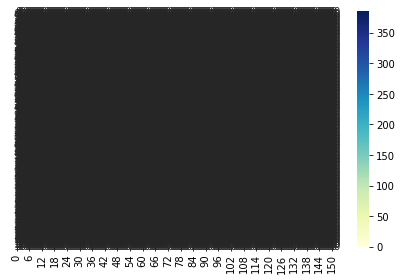

In [95]:
# Visualise the confusion matrix as a Seaborn Heatmap
sns.heatmap(cf_matrix, annot=True, fmt="d", yticklabels=False, cmap="YlGnBu")

# If you want to save the graph to disk
plt.tight_layout() # automatically adjusts subplot to fit in the figure area
plt.savefig('confusion-matrix-initial.png', dpi=300) # dpi=300 is print quality

In [120]:
recall = recall_score(y_test, y_pred)
print(f"recall: {recall}")

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [97]:
precision = precision_score(y_test, y_pred, average='micro')
print(f"precision: {precision}")

precision: 0.564327485380117


In [98]:

f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1 score: {f1}")

F1 score: 0.004715655732698064


In [119]:
# Either
# Method 1 - Extract tn, fp, fun and tp manually from the confusion matrix
#cf_matrix = confusion_matrix(y_test, y_pred)
# NOTE: the positions of tn, fp. fn, tp in the matrix is not standard! Check carefully
#tp = cf_matrix[1, 1] # row=1, col=1 - second row, second column
#tn = cf_matrix[0, 0] # row=0, col=0 - first row, first column
#fp = cf_matrix[0, 1] # row=0, col=1 - first row, second column
#fn = cf_matrix[1, 0] # row=1, col=0 - second row, first column
# Or
# Method2. Use numpy's ravel() function to flatten the 2D confusion matrix to a 1D array
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Print
print(f"tn {tn}")
print(f"fp {fp}" )
print(f"fn {fn}")
print(f"tp {tp}")

# Precision
precision = tp / (tp + fp)
print(f"precision: {precision}")

# Recall
recall = tp / (tp + fn)
print(f"recall: {recall}")

# F1
f1 = 2 * (precision * recall) / (precision + recall)
print(f"F1 score: {f1}")

ValueError: too many values to unpack (expected 4)

In [103]:
print(classification_report(y_te4)

SyntaxError: incomplete input (3450035828.py, line 1)

In [118]:
# Call function roc_curve() to get the false positive rates (fpr) and true positive rates
# Need to pass the list of actual and predicted classes as parameters to the function
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
#print(fpr)
#print(tpr)

# Call the auc() function to calculate the area under the curve
# Need to pass the false positive rates (fpr) and true positive rates as parameters to the function
roc_auc = auc(fpr,tpr)
print(f'AUC: {roc_auc:0.2f}') # float 2 places of decimal

# Plot ROC curve
plt.figure()
plt.plot(fpr,tpr,label='ROC curve(area= %2.f)' %roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.grid()
#plt.show()

# If you want to save the graph to disk
plt.tight_layout() # automatically adjusts subplot to fit in the figure area
plt.savefig('roc-curve-initial.png', dpi=300) # dpi=300 is print quality

ValueError: multiclass format is not supported

In [105]:
# (614, 8) ==> 9 features
X_train.shape

(2735, 4)

In [106]:
# Library for pickling
import joblib

# Also need pandas and nympy for some tasks
import pandas as pd
import numpy as np

# Library for splitting the data into train and test sets
from sklearn.model_selection import train_test_split 

# Libraries to select k best features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Attempt 1

In [109]:
# This is a trial and error process
# There are 8 features in this data set
# First let's try k=7
X_selected = SelectKBest(chi2, k=4).fit_transform(X_train, y_train)

# Print the type and shape of the selected features
print(type(X_selected))
print(X_selected.shape)

# Print the first 5 rows of the selected features
np.set_printoptions(suppress=True) # Suppress scientific notation when printing
print(X_selected[:5])

# Print the first 5 rows of all the features in the dataset
X_train.head()

<class 'numpy.ndarray'>
(2735, 4)
[[ 40.    4.   83.    4. ]
 [  2.    3.   22.    0. ]
 [ 27.    2.   93.    3.4]
 [ 25.    3.  120.    0. ]
 [ 21.    4.   84.    0. ]]


,yrs_experience,family_size,income,credit_card_spend
2331,40.0,4.0,83.0,4.0
3156,2.0,3.0,22.0,0.0
691,27.0,2.0,93.0,3.4
1077,25.0,3.0,120.0,0.0
1072,21.0,4.0,84.0,0.0


# Attempt 2

In [110]:
# Try k=6
X_selected = SelectKBest(chi2, k=4).fit_transform(X_train, y_train)

# Print the type and shape of the selected features
print(type(X_selected))
print(X_selected.shape)

# Print the first 5 rows of the selected features
print(X_selected[:5])

# Print the first 5 rows of all the features in the dataset
X_train.head()

<class 'numpy.ndarray'>
(2735, 4)
[[ 40.    4.   83.    4. ]
 [  2.    3.   22.    0. ]
 [ 27.    2.   93.    3.4]
 [ 25.    3.  120.    0. ]
 [ 21.    4.   84.    0. ]]


,yrs_experience,family_size,income,credit_card_spend
2331,40.0,4.0,83.0,4.0
3156,2.0,3.0,22.0,0.0
691,27.0,2.0,93.0,3.4
1077,25.0,3.0,120.0,0.0
1072,21.0,4.0,84.0,0.0


# Attempt 3

In [112]:
# Try k=5
X_selected = SelectKBest(chi2, k=4).fit_transform(X_train, y_train)

# Print the type and shape of the selected features
print(type(X_selected))
print(X_selected.shape)

# Print the first 5 rows of the selected features
print(X_selected[:5])

# Print the first 5 rows of all the features in the dataset
X_train.head()

<class 'numpy.ndarray'>
(2735, 4)
[[ 40.    4.   83.    4. ]
 [  2.    3.   22.    0. ]
 [ 27.    2.   93.    3.4]
 [ 25.    3.  120.    0. ]
 [ 21.    4.   84.    0. ]]


,yrs_experience,family_size,income,credit_card_spend
2331,40.0,4.0,83.0,4.0
3156,2.0,3.0,22.0,0.0
691,27.0,2.0,93.0,3.4
1077,25.0,3.0,120.0,0.0
1072,21.0,4.0,84.0,0.0


# Attempt 4

In [113]:
# Try k=4
X_selected = SelectKBest(chi2, k=4).fit_transform(X_train, y_train)

# Print the type and shape of the selected features
print(type(X_selected))
print(X_selected.shape)

# Print the first 5 rows of the selected features
print(X_selected[:5])

# Print the first 5 rows of all the features in the dataset
X_train.head()

<class 'numpy.ndarray'>
(2735, 4)
[[ 40.    4.   83.    4. ]
 [  2.    3.   22.    0. ]
 [ 27.    2.   93.    3.4]
 [ 25.    3.  120.    0. ]
 [ 21.    4.   84.    0. ]]


,yrs_experience,family_size,income,credit_card_spend
2331,40.0,4.0,83.0,4.0
3156,2.0,3.0,22.0,0.0
691,27.0,2.0,93.0,3.4
1077,25.0,3.0,120.0,0.0
1072,21.0,4.0,84.0,0.0


In [114]:
# When checking the number of unique values, the blood pressure column was found to contain 47 values
# This is evidence that it's a continuous variable

# Some classification algorithms do not work well with continuous values - too many values
# So, depending on the classification algorithm you are usind, you might need to categorise these values
# How? Need some domain knowlege
# For blood pressure we could use the following:
# less than 80 = normal, between 80-89 = high, greater than 89 = very high

# Define a function to classify this
# Pass the whole dataframe as parameter
# And return a category (a word label but you could also return numeric labels)
# NOTE: Do not create too many categories as this will affect the learning algorithms
def income_category(df): 
    if df["income"] <= 50:
        return "low_income"
    elif (df["income"] > 50) & (df["income"] <= 89):
        return "middle_income"
    elif df["income"] > 89:
        return "high_income"
    


In [115]:
# Apply the  previously defined function to the training set

# Use apply() to apply a lambda function for all the rows of the dataframe
# The lambda function calls the previously defined function bp_category()
# To which it passes the diabetes_df as parameter
# And a category is returned and saved in a new column named "blood_pressure_category"
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html
# the backslash is a line continuation character - there should be nothing after it, not even a space

# Warning: A value is trying to be set on a copy of a slice from a DataFrame.
# Try using .loc[row_indexer,col_indexer] = value instead
# Below is another fix - make a copy
X_train = X_train.copy()
X_train["income_category"] = \
    X_train.apply(lambda X_train:bp_category(X_train), axis = 1) # axis=1 = row-wise

# The column "blood_pressure" is no longer needed and hence can be deleted 
X_train.drop(['income'], axis=1, inplace=True)

# Check
X_train.head()

,yrs_experience,family_size,credit_card_spend,income_category
2331,40.0,4.0,4.0,middle_income
3156,2.0,3.0,0.0,low_income
691,27.0,2.0,3.4,high_income
1077,25.0,3.0,0.0,high_income
1072,21.0,4.0,0.0,middle_income


In [116]:
# Apply the  previously defined function to the testing set
X_test = X_test.copy()
X_test["income_category"] = \
    X_test.apply(lambda X_test:bp_category(X_test), axis = 1) # axis=1 = row-wise

# The column "blood_pressure" is no longer needed and hence can be deleted 
X_test.drop(['income'], axis=1, inplace=True)

# Check
X_test.head()

,yrs_experience,family_size,credit_card_spend,income_category
1664,36.0,3.0,1.1,high_income
993,11.0,2.0,0.0,middle_income
2911,9.0,4.0,0.0,middle_income
994,12.0,2.0,0.0,low_income
137,40.0,2.0,0.0,low_income


In [117]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.56      1.00      0.72       386
        70.0       0.00      0.00      0.00         6
        71.0       0.00      0.00      0.00         4
        72.0       0.00      0.00      0.00         1
        73.0       0.00      0.00      0.00         1
        74.0       0.00      0.00      0.00         1
        75.0       0.00      0.00      0.00         2
        76.0       0.00      0.00      0.00         3
        77.0       0.00      0.00      0.00         1
        78.0       0.00      0.00      0.00         2
        79.0       0.00      0.00      0.00         2
        80.0       0.00      0.00      0.00         8
        81.0       0.00      0.00      0.00         6
        83.0       0.00      0.00      0.00         2
        84.0       0.00      0.00      0.00         4
        85.0       0.00      0.00      0.00         2
        86.0       0.00      0.00      0.00         2
        87.0       0.00    

/Users/sohilpachbhaiya/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sohilpachbhaiya/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sohilpachbhaiya/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu